<h2>Anemia Detection </h2>

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score


In [12]:
data = pd.read_csv('anemia.csv')
data

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


Exploratory Data Analysis

In [13]:
data.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [14]:
data.isna().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [22]:
data['Result'].value_counts()

Result
0    801
1    620
Name: count, dtype: int64

<Axes: xlabel='Result', ylabel='count'>

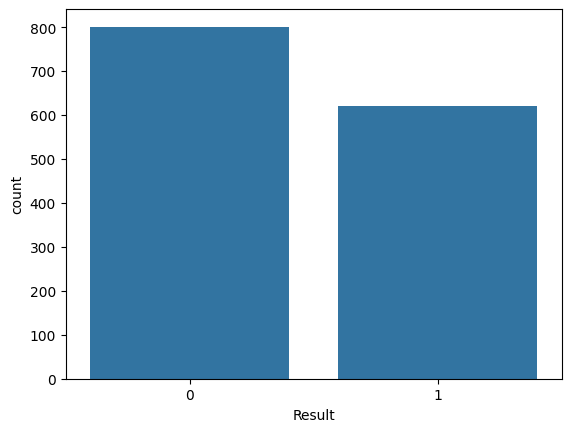

In [20]:
sb.barplot(data['Result'].value_counts())

<Axes: xlabel='Gender', ylabel='count'>

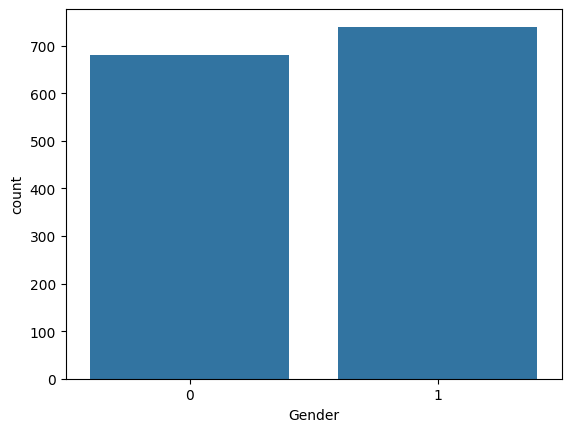

In [21]:
sb.barplot(data['Gender'].value_counts())

In [24]:
x = data.drop('Result', axis=1)
y = data['Result']

In [25]:
x

,Gender,Hemoglobin,MCH,MCHC,MCV
0,1,14.9,22.7,29.1,83.7
1,0,15.9,25.4,28.3,72.0
2,0,9.0,21.5,29.6,71.2
3,0,14.9,16.0,31.4,87.5
4,1,14.7,22.0,28.2,99.5
...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7
1419,0,14.3,16.2,29.5,95.2


Model Training

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2)

- Model 1: MlpClassifier

In [32]:
anemia_model1 = MLPClassifier()
anemia_model1.fit(x_train, y_train)

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [50]:
ypred = anemia_model1.predict(x_test)
acc1 = accuracy_score(y_test,ypred)
fs1 = f1_score(y_test,ypred)
pre1 = precision_score(y_test,ypred)
rec1 = recall_score(y_test,ypred)
rc1 = roc_auc_score(y_test,ypred)

- Model 2: LogisticRegression

In [35]:
anemia_model2 = LogisticRegression()
anemia_model2.fit(x_train, y_train)

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
ypred2 = anemia_model2.predict(x_test)
acc2 = accuracy_score(y_test,ypred2)
fs2 = f1_score(y_test,ypred2)
pre2 = precision_score(y_test,ypred2)
rec2 = recall_score(y_test,ypred2)
rc2 = roc_auc_score(y_test,ypred2)

In [52]:
dict = {
    'Model Names' : ["MLPClassifier", "LogisticRegression"],
    "Accuracy" : [acc1, acc2],
    "Precision" : [pre1, pre2],
    "Recall" : [rc1, rc2],
    "F1-score" : [fs1, fs2],
    "Roc-Auc" : [rc1, rc2]
}

Model Comparison

In [53]:
df = pd.DataFrame(dict)

In [54]:
df

,Model Names,Accuracy,Precision,Recall,F1-score,Roc-Auc
0,MLPClassifier,0.996491,0.991228,0.997093,0.995595,0.997093
1,LogisticRegression,0.996491,0.991228,0.997093,0.995595,0.997093
